# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [12]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
np.random.seed(42)
n = 100

data = pd.DataFrame({
    "age": np.random.randint(18, 80, n),
    "bmi": np.round(np.random.normal(27, 5, n), 2),
    "blood_pressure": np.random.randint(90, 180, n),
    "cholesterol": np.random.randint(150, 300, n),
    "diabetes_risk_score": np.round(np.random.uniform(0, 1, n), 3)
})

data.to_csv("health_dataset.csv", index=False)

print("Dataset_Diabetes")


Dataset_Diabetes


# 3. Homework - work with your own data

In [14]:
df_health_dataset_load = pd.read_csv("health_dataset.csv")


In [15]:
df_health_dataset_load.describe()

,age,bmi,blood_pressure,cholesterol,diabetes_risk_score
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.270000,27.104400,130.830000,226.250000,0.495690
std,19.176403,4.932725,25.203838,42.672437,0.296562
min,19.000000,14.510000,90.000000,154.000000,0.011000
25%,34.750000,23.465000,109.000000,195.000000,0.272500
50%,51.500000,26.875000,126.500000,217.500000,0.497500
75%,68.000000,30.542500,150.750000,264.250000,0.751000
max,79.000000,40.280000,179.000000,299.000000,0.991000


In [16]:
df_health_dataset_load.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  100 non-null    int64  
 1   bmi                  100 non-null    float64
 2   blood_pressure       100 non-null    int64  
 3   cholesterol          100 non-null    int64  
 4   diabetes_risk_score  100 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 4.0 KB


In [17]:
df_health_dataset_load.head()

,age,bmi,blood_pressure,cholesterol,diabetes_risk_score
0,56,30.49,105,166,0.156
1,69,26.14,162,195,0.250
2,46,22.46,148,266,0.549
3,32,32.94,159,155,0.715
4,60,30.93,169,248,0.660


In [19]:
dup_rows = df_health_dataset_load.duplicated().sum()
print("Duplicate rows:", dup_rows)

Duplicate rows: 0


In [22]:
for col in df_health_dataset_load.columns:
    print(f"{col}: {df_health_dataset_load[col].duplicated().sum()} duplicate values")


age: 49 duplicate values
bmi: 2 duplicate values
blood_pressure: 39 duplicate values
cholesterol: 29 duplicate values
diabetes_risk_score: 5 duplicate values


In [24]:
#Mean
print("Mean:")
print(df_health_dataset_load.mean(numeric_only=True))

#Median
print("Median:")
print(df_health_dataset_load.median(numeric_only=True))

#Mode
print("Mode:")
print(df_health_dataset_load.mode(numeric_only=True))

Mean:
age                     50.27000
bmi                     27.10440
blood_pressure         130.83000
cholesterol            226.25000
diabetes_risk_score      0.49569
dtype: float64
Median:
age                     51.5000
bmi                     26.8750
blood_pressure         126.5000
cholesterol            217.5000
diabetes_risk_score      0.4975
dtype: float64
Mode:
    age    bmi  blood_pressure  cholesterol  diabetes_risk_score
0  61.0  29.30           122.0        207.0                0.071
1   NaN  30.49           137.0          NaN                0.282
2   NaN    NaN             NaN          NaN                0.319
3   NaN    NaN             NaN          NaN                0.751
4   NaN    NaN             NaN          NaN                0.905


In [25]:
missing_values = df_health_dataset_load.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
age                    0
bmi                    0
blood_pressure         0
cholesterol            0
diabetes_risk_score    0
dtype: int64


In [27]:
print("Age < 0:", (df_health_dataset_load["age"] < 0).sum())
print("Age > 120:", (df_health_dataset_load["age"] > 120).sum())
print("BMI <= 0:", (df_health_dataset_load["bmi"] <= 0).sum())
print("Blood Pressure <= 0:", (df_health_dataset_load["blood_pressure"] <= 0).sum())
print("Cholesterol <= 0:", (df_health_dataset_load["cholesterol"] <= 0).sum())
print("Risk Score outside 0-1:", 
      ((df_health_dataset_load["diabetes_risk_score"] < 0) | 
       (df_health_dataset_load["diabetes_risk_score"] > 1)).sum())


Age < 0: 0
Age > 120: 0
BMI <= 0: 0
Blood Pressure <= 0: 0
Cholesterol <= 0: 0
Risk Score outside 0-1: 0


In [30]:
categorical_cols = df_health_dataset_load.select_dtypes(include=["object"]).columns
df_encoded = pd.get_dummies(df_health_dataset_load, columns=categorical_cols, drop_first=True)
df_encoded.head()

,age,bmi,blood_pressure,cholesterol,diabetes_risk_score
0,56,30.49,105,166,0.156
1,69,26.14,162,195,0.250
2,46,22.46,148,266,0.549
3,32,32.94,159,155,0.715
4,60,30.93,169,248,0.660


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

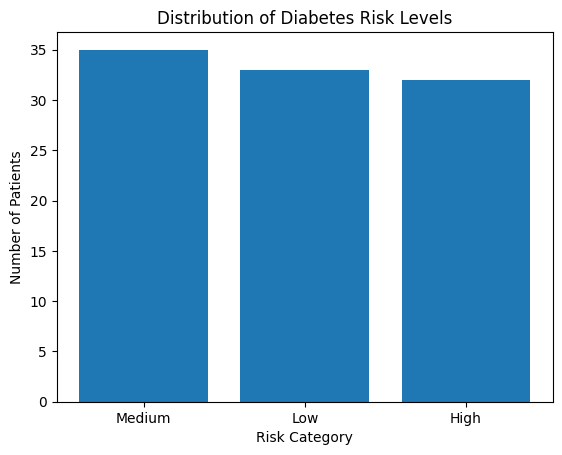

In [34]:
import matplotlib.pyplot as plt
df_health_dataset_load["risk_category"] = pd.cut(
    df_health_dataset_load["diabetes_risk_score"],
    bins=[0, 0.33, 0.66, 1],
    labels=["Low", "Medium", "High"])

risk_counts = df_health_dataset_load["risk_category"].value_counts()

plt.figure()
plt.bar(risk_counts.index, risk_counts.values)

plt.xlabel("Risk Category")
plt.ylabel("Number of Patients")
plt.title("Distribution of Diabetes Risk Levels")
plt.show()